In [81]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load data

Below we load data from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/) to better understand how to use linear regressions.

> The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [83]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In this dataset Sales is the dependent variable (Y), while TV, Radio and Newspaper are indepednent varialbes (X1, X2 and X3 respectively)

>  It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.

While our goal as journalists is rarely to instruct clients, we are interested in explaining phenomena. How much of this phenomenon of sales can be explained by the tree predictor variables (X1, X2 and X3) using a linear model? 

Let's find out...once we grasp the basics, we can move on to journalistic applicaitons.

# Exploring the data

From the documentation
> Advertising data sales (in thousands of units) for a particular product and advertising budgets (in thousands of dollars) for TV, radio, and newspaper media

In [84]:
# summary stats
advertising.describe().round(1)

,TV,Radio,Newspaper,Sales
count,200.0,200.0,200.0,200.0
mean,147.0,23.3,30.6,14.0
std,85.9,14.8,21.8,5.2
min,0.7,0.0,0.3,1.6
25%,74.4,10.0,12.8,10.4
50%,149.8,22.9,25.8,12.9
75%,218.8,36.5,45.1,17.4
max,296.4,49.6,114.0,27.0


In [85]:
%%R -i advertising

require('tidyverse')

advertising <- advertising %>% mutate(station_id=row_number())
advertising_long <- advertising %>% 
    pivot_longer(cols=-c('station_id', 'Sales'), 
                values_to='expenditure', 
                names_to='media_type')

advertising_long

# A tibble: 600 × 4
   Sales station_id media_type expenditure
   <dbl>      <int> <chr>            <dbl>
 1  22.1          1 TV               230. 
 2  22.1          1 Radio             37.8
 3  22.1          1 Newspaper         69.2
 4  10.4          2 TV                44.5
 5  10.4          2 Radio             39.3
 6  10.4          2 Newspaper         45.1
 7   9.3          3 TV                17.2
 8   9.3          3 Radio             45.9
 9   9.3          3 Newspaper         69.3
10  18.5          4 TV               152. 
# … with 590 more rows
# ℹ Use `print(n = ...)` to see more rows


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


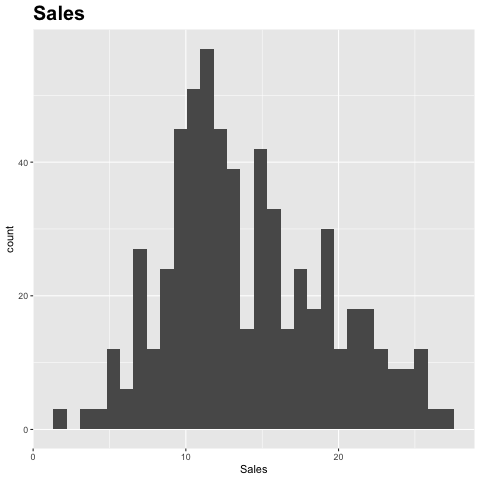

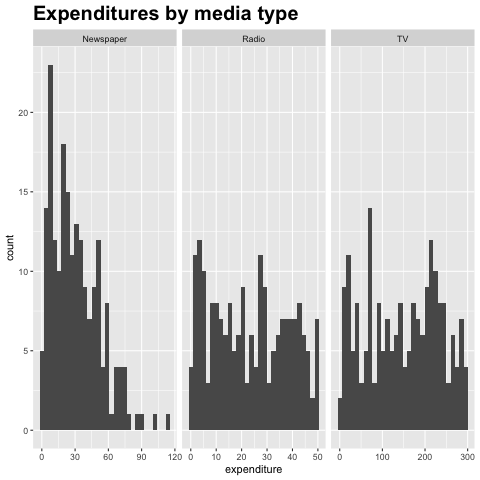

In [47]:
%%R 

# Show sales
sales_plt <- ggplot(advertising_long, aes(x=Sales)) + 
    geom_histogram() + 
    labs(title="Sales") +
    theme(
        plot.title = element_text(size=20, face="bold"),
    )

print(sales_plt)

# Show expenditures plot
expenditures_plt <- ggplot(advertising_long, aes(x=expenditure)) + 
    geom_histogram() + 
    facet_wrap(~media_type, scales='free_x') +
    labs(title="Expenditures by media type") +
    theme(
        plot.title = element_text(size=20, face="bold"),
    )
 
print(expenditures_plt)
 

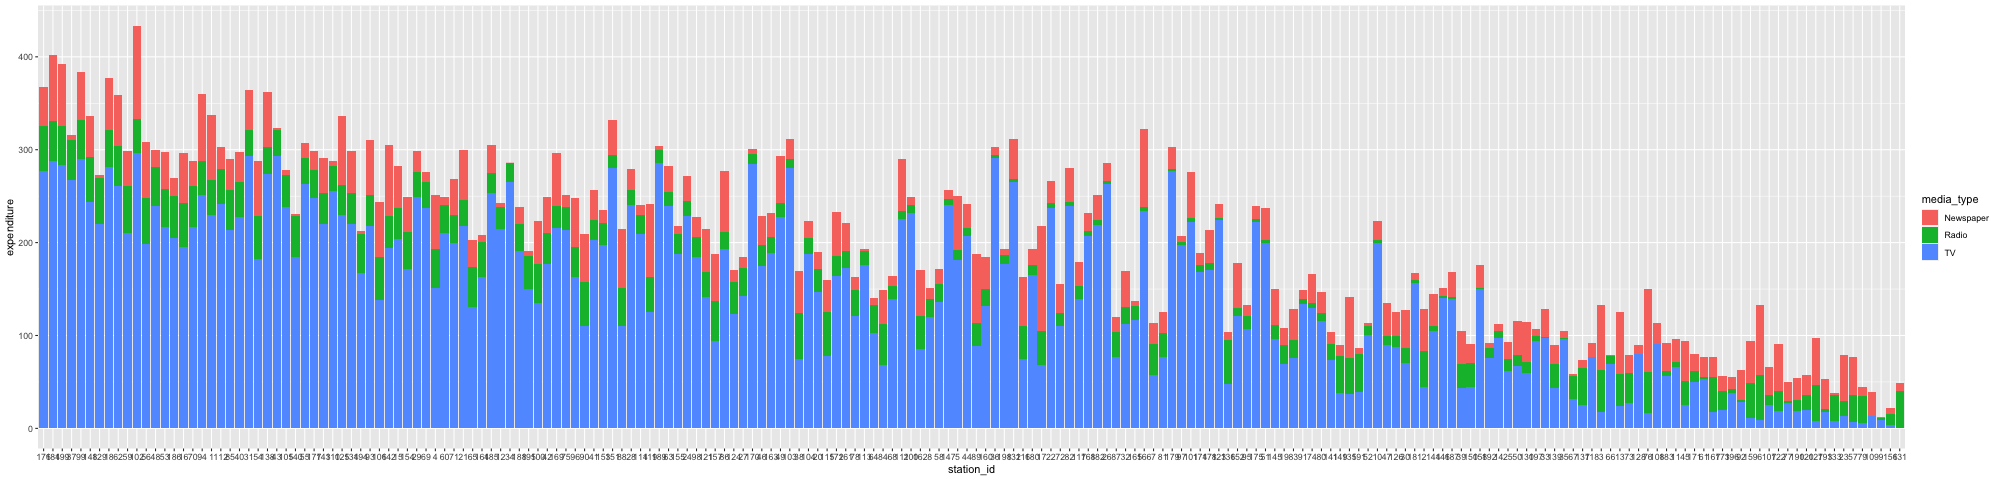

In [86]:
%%R -w 2000

advertising <- advertising %>% arrange(desc(Sales))
advertising_long$station_id <- factor(advertising_long$station_id, levels=advertising$station_id)

# Each data point is a media market. I want a representation of the data that shows each data point
ggplot(advertising_long) +
        aes(y=expenditure, x=station_id, fill=media_type) +
        geom_col() 

# Single Variable Regressions

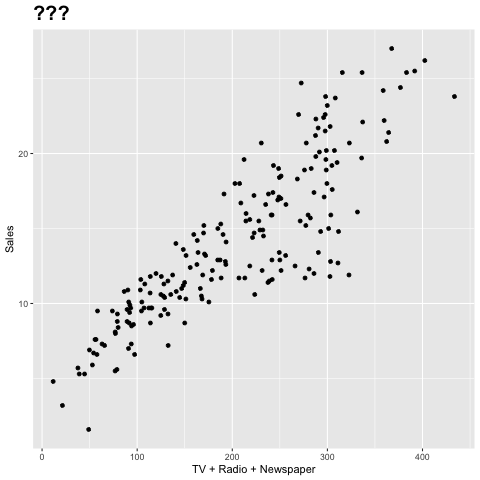

In [87]:
%%R 

# Is there a correlation between ad spending and sales?
ggplot(advertising, aes(x=TV+Radio+Newspaper, y=Sales)) +
     geom_point() +
     labs(title="???") +
     theme(
        plot.title = element_text(size=20, face="bold"),
    )


In [ ]:
%%R 

# Write Regression Code Here and Interpret
# (don't forget to add the regression lines to the charts above)



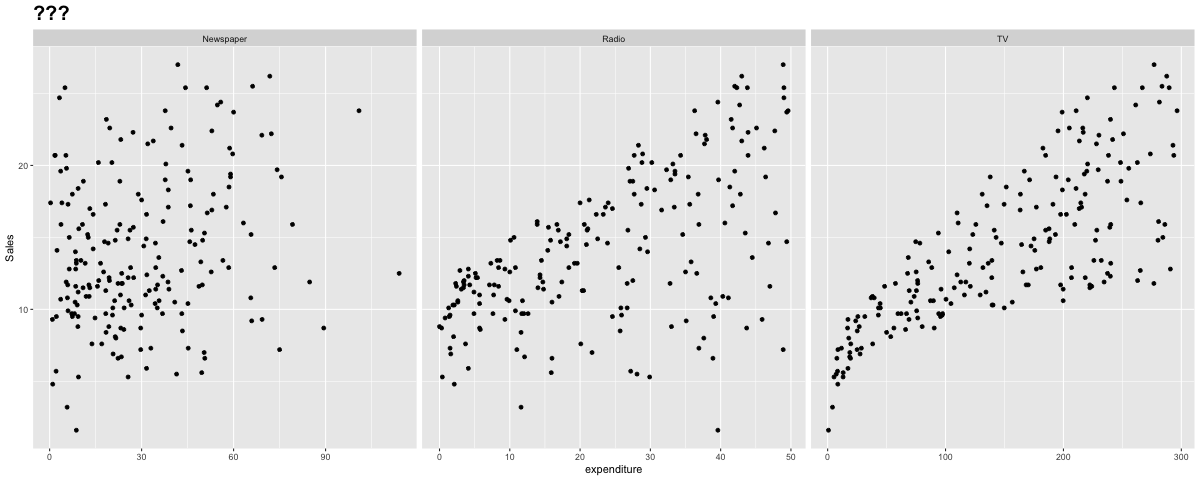

In [75]:
%%R -w 1200

# Hmm...how about each type of spending?

ggplot(advertising_long) + 
    aes(x=expenditure, y=Sales) +
    geom_point() + 
    facet_wrap(~media_type, scales='free_x') +
    labs(title="???") +
    theme(
        plot.title = element_text(size=20, face="bold")
    )


In [ ]:
%%R 

# Write Regression Code Here and Interpret
# (don't forget to add the regression lines to the charts above)


# Multivariable Regression Models

In [93]:
%%R 

# Y ~ X1 + X2 + X3
# Now we are in 4-dimensional space, so we can't visualize it easily...

model <- lm(Sales ~ TV + Radio + Newspaper, data=advertising)
summary(model)



Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16



## Interaction effects

But wait...what if X1 and X2 aren't independent? You'll notie here that Radio and TV expenditures are correlated. This is called an interaction effect.


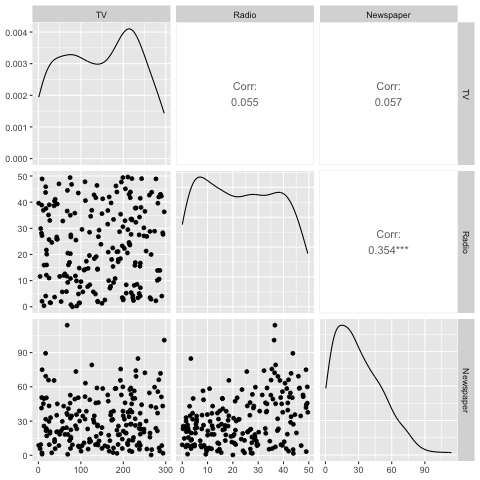

In [80]:
%%R 
library("GGally")

# Sometimes it's nice to make a pairplot to quickly see relationships between variables
ggpairs(advertising %>% select(TV, Radio, Newspaper))

![](assets/interaction-effect.png)

In [96]:
%%R 

# re-run the model, taking into account that interaction effect
model <- lm("Sales ~ TV + Radio + TV:Radio", data=advertising)
summary(model)


Call:
lm(formula = "Sales ~ TV + Radio + TV:Radio", data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3366 -0.4028  0.1831  0.5948  1.5246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.750e+00  2.479e-01  27.233   <2e-16 ***
TV          1.910e-02  1.504e-03  12.699   <2e-16 ***
Radio       2.886e-02  8.905e-03   3.241   0.0014 ** 
TV:Radio    1.086e-03  5.242e-05  20.727   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9435 on 196 degrees of freedom
Multiple R-squared:  0.9678,	Adjusted R-squared:  0.9673 
F-statistic:  1963 on 3 and 196 DF,  p-value: < 2.2e-16



## Appendix: Quick reference for the statsmodels python package

https://investigate.ai/reference/regression/